## Neural Network Classification with TensorFlow

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

### 1. Data preparation

In [2]:
sample_number = 1000

x, y = make_circles(sample_number, noise = 0.03,
    random_state = 42)

In [3]:
circle = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "label": y})

circle.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
circle.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

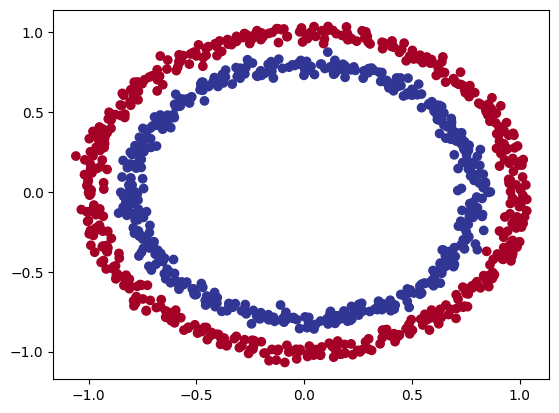

In [5]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = plt.cm.RdYlBu);

In [6]:
x.shape, y.shape, len(x), len(y)

((1000, 2), (1000,), 1000, 1000)

In [7]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### 2. Model building

In [8]:
tf.random.set_seed(42)

first_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

first_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(), metrics = ['accuracy'])

### set build with input shape to prevent error for 'model has not yet been built'
### choose 2 because we have 2 features
first_model.build((None, 2))
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
first_model_history = first_model.fit(x, y, epochs = 5)

first_model.evaluate(x, y)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6755 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1817 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.3774 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7468 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.4940


[0.7006893754005432, 0.49399998784065247]

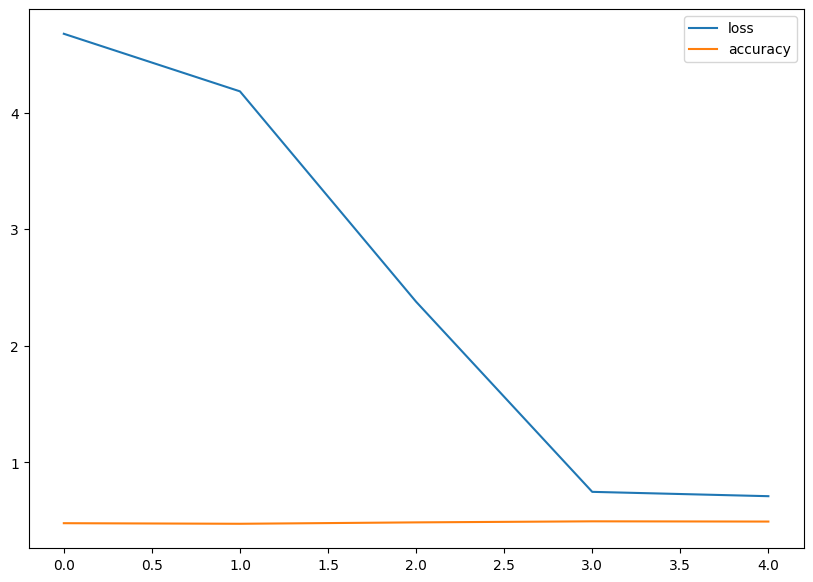

In [10]:
pd.DataFrame(first_model_history.history).plot(figsize = (10, 7));

In [11]:
first_model_history = first_model.fit(x, y, epochs = 200, verbose = 0)

first_model.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

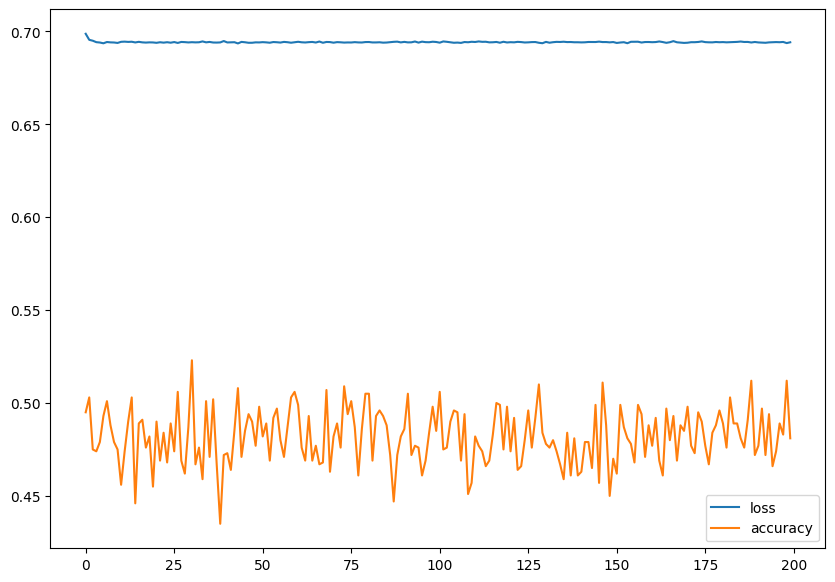

In [12]:
pd.DataFrame(first_model_history.history).plot(figsize = (10, 7));

In [13]:
tf.random.set_seed(42)

second_model = tf.keras.Sequential([
    ### add extra layer
    tf.keras.layers.Dense(1), 
    tf.keras.layers.Dense(1)
])

second_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(), metrics = ['accuracy'])

second_model.build((None, 2))
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
second_model_history = second_model.fit(x, y, epochs = 100, verbose = 0)

second_model.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932358145713806, 0.5]

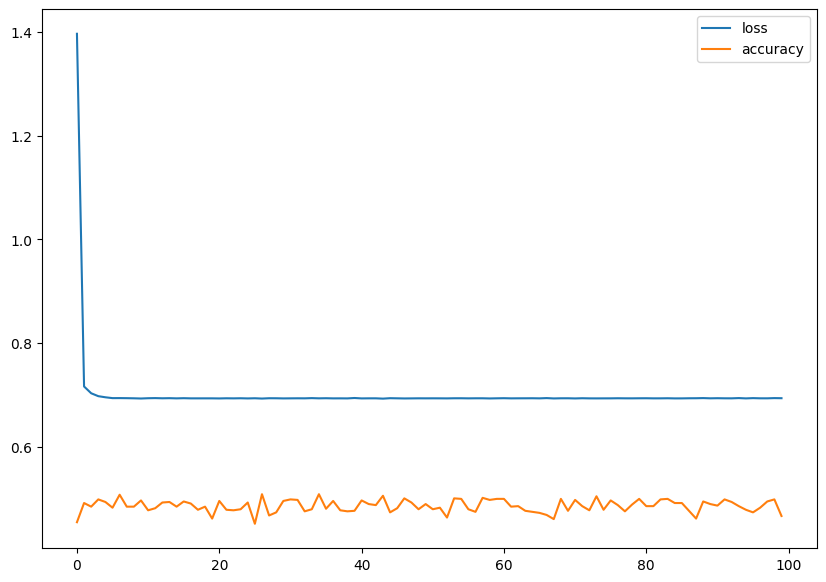

In [15]:
pd.DataFrame(second_model_history.history).plot(figsize = (10, 7));

In [16]:
tf.random.set_seed(42)

third_model = tf.keras.Sequential([
    ### add layer with 100 unit neuron
    tf.keras.layers.Dense(100),
    ### add layer with 10 unit neuron
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

third_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

third_model.build((None, 2))
third_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
third_model_history = third_model.fit(x, y, epochs = 100, verbose = 0)

third_model.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5070


[0.6986583471298218, 0.5070000290870667]

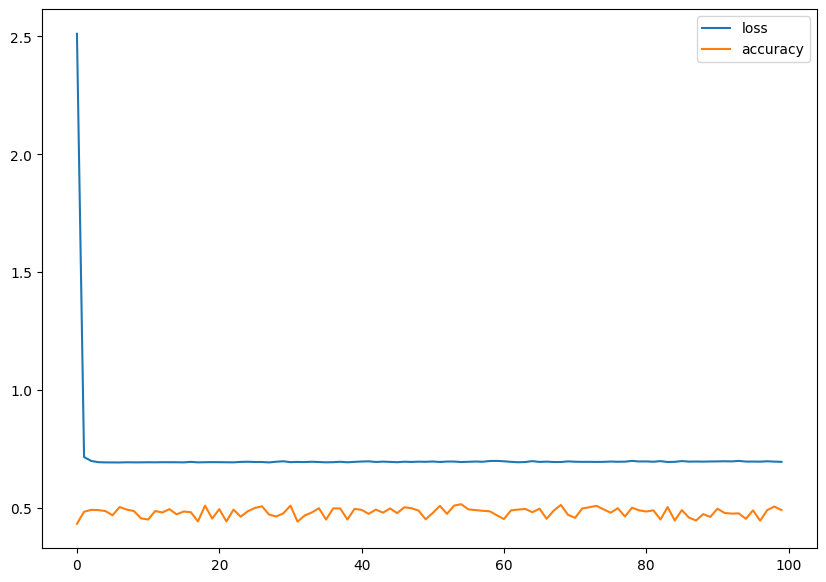

In [18]:
pd.DataFrame(third_model_history.history).plot(figsize = (10, 7));

In [19]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

In [33]:
tf.random.set_seed(42)

tenth_model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

tenth_model.compile(loss = "binary_crossentropy", optimizer = "Adam",
    metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

tenth_model_history = tenth_model.fit(x_train, y_train,
    epochs = 100, callbacks = [lr_scheduler], verbose = 0)

Take the learning rate value where the loss is still decreasing but not quite flattened out, 10x smaller than the bottom of the curve.

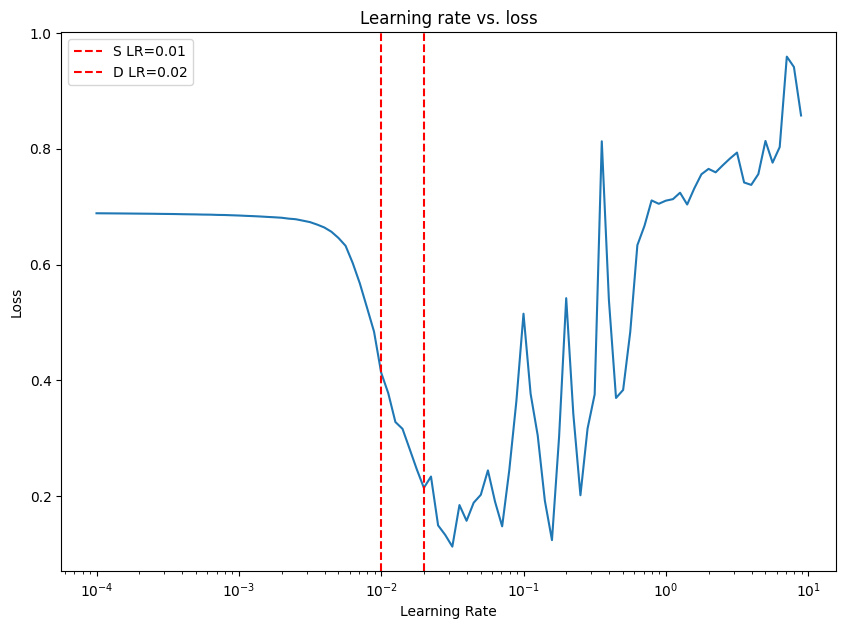

In [34]:
lrs = 1e-4 * (10 ** (np.arange(100) / 20))

plt.figure(figsize = (10, 7))
plt.semilogx(lrs, tenth_model_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
start_lr = 0.01
desired_lr = 0.02
plt.axvline(x = start_lr, color = 'r', linestyle = '--', label = f'S LR={start_lr}')
plt.axvline(x = desired_lr, color = 'r', linestyle = '--', label = f'D LR={desired_lr}')
plt.legend()
plt.show();